# Online POMDP Methods

## POMCP

POMCP is one of the most widely-used online POMDP methods. It is a variant of Monte Carlo tree search in which each node corresponds to an action-observation history.

(To get the required packages for this notebook, make sure to run the `install.jl` script)

In [1]:
using POMDPModels # for the crying baby problem
using POMDPModelTools
using POMDPs
using BasicPOMCP
using Interact
using Random
using Base64
rng = MersenneTwister(7);

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7392484747830271981\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3620257254049277396\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7392484747830271981\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
pomdp = BabyPOMDP()
b = initialstate_distribution(pomdp);

Since POMCP is an online method, it does no offline computation before being deployed into the environment. Thus the `solve` function from `POMDPs.jl` does no computation, but instead creates a planner optimized for the problem.

In [3]:
solver = POMCPSolver(c=10.0); # c is the exploration constant
planner = solve(solver, pomdp);

### Building the tree

To make a decision, POMCP constructs a tree by repeating the following process:
1. run a simulation through the tree choosing actions based on the *UCB criterion*
2. when a leaf node is reached, expand the node one level deeper and continue the simulation with a *rollout policy* (often random)
3. propagate the rewards back up the tree to maintain an estimate of the *value*\* for each action

\*This is denoted by *V* in the `BasicPOMCP` package and the original paper that describes POMCP, but it is the same thing as the state-action value typically denoted by *Q*.

In [4]:
N = 10
tree = BasicPOMCP.POMCPTree(pomdp)
trees = [deepcopy(tree)]
for i in 1:N
    s = rand(rng, b)
    BasicPOMCP.simulate(planner, s, BasicPOMCP.POMCPObsNode(tree, 1), 10)
    push!(trees, deepcopy(tree))
end

In [5]:
@manipulate for i in 1:length(trees)
    D3Tree(trees[i], init_expand=100, init_duration=0)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\rmoss\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\rmoss\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\rmoss\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\rmoss\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\rmoss\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000002ba4ee10, Task (runnable) @0x000000002ba4ee10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"15118383649967893234\",\"id\":\"ob_02\",\"type\":\"observable

### Online operation

When the agent is interacting with the environment, it constructs a new tree at each step, makes a decision. For this demonstation, we'll use the LaserTag problem.

Invalid Parameter - C:\Users\rmoss\AppData\Local\Temp\jl_A3C1.tmp.pdf


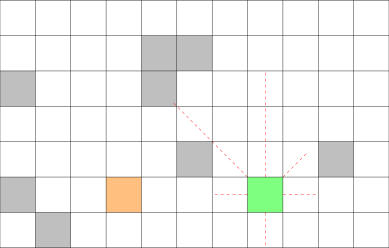

In [25]:
using LaserTag
using Base64
rng = MersenneTwister(14)
laser = gen_lasertag(rng=rng)
s = initialstate(laser, rng)
sp,o,r = generate_sor(laser, s, 1, rng)
render(laser, (sp=sp, o=o))

Since the problem is discrete, we can solve the fully-observable version offline and use the resulting value estimate instead of rollouts. We use an exploration constant of 20 and limit to 1000 iterations (the visualization becomes slower if more than 1000 are used, but many more should be used to get a good solution for the problem).

In [69]:
using DiscreteValueIteration
using POMDPModelTools
using BasicPOMCP
using ParticleFilters
rng = MersenneTwister(13)
solver = POMCPSolver(tree_queries=1000,
                     c=20.0,
                     max_depth=100,
                     #estimate_value=FOValue(ValueIterationSolver()),
                     tree_in_info=true,
                     rng=rng
                    )
planner = solve(solver, laser);

At each step of the simulation, the belief is updated, the planner constructs a tree, and makes an action decision based on that tree.

In [70]:
using POMDPSimulators
using POMDPPolicies
up = SIRParticleFilter(laser, 10000, rng=rng)

hr = HistoryRecorder(max_steps=100, show_progress=true)
history = simulate(hr, laser, planner, up)

Simulating...100%|██████████████████████████████████████| Time: 0:00:05


The belief state and tree constructed at each step are shown below.

In [71]:
using Interact
using D3Trees
steps = eachstep(history, "a,r,sp,o,bp")
ltrees = collect(step[:tree] for step in eachstep(history, "ai"))
BasicPOMCP.node_tag(a::Int) = LaserTag.ACTION_NAMES[a] 
@manipulate for i in 1:length(ltrees)
    ltree = stringmime("text/html", D3Tree(ltrees[i],
                                          init_duration=0,
                                          init_expand=1,
                                          svg_height=300))
    pic = stringmime("image/svg+xml", LaserTagVis(laser, steps[i]...))
    HTML("""<div style="width: 300px; margin: 0 auto">$pic</div><div>$ltree</div>""")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 29,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\rmoss\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\rmoss\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\rmoss\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\rmoss\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\rmoss\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000012710b90, Task (runnable) @0x0000000012710b90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\